In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aggiungi il percorso corretto al modulo src
project_src_path = Path.cwd().parent / 'src'
sys.path.append(str(project_src_path))

# Importa i moduli corretti senza 'src.'
from model.efficient_frontier.markowitz_optimizer import MarkowitzOptimizer
from model.postprocessing.visualizer import Visualizer


INFO:model.efficient_frontier.markowitz_optimizer:Logger configurato per il modulo model.efficient_frontier.markowitz_optimizer
INFO:model.postprocessing.visualizer:Logger configurato per il modulo model.postprocessing.visualizer


In [2]:
# Configurazione perscorsi
#DATA_PATH = Path('../data/processed/returns.csv')
DATA_PATH = Path('../data/raw')
OUTPUT_PATH = Path('../results')
OUTPUT_PATH.mkdir(exist_ok=True)

In [3]:
def load_and_preprocess_data(data_path: Path) -> pd.DataFrame:
    """Carica e prepara i dati storici"""
    stocks = ['AAPL', 'GOOGL', 'MSFT']
    
    # Leggi e combina i CSV
    dfs = []
    for ticker in stocks:
        df = pd.read_csv(
            data_path / f"{ticker}.csv",
            parse_dates=['Date'],
            usecols=['Date', 'Close'],
            index_col='Date'
        )
        df.columns = [ticker]
        dfs.append(df)
    
    combined = pd.concat(dfs, axis=1)
    return combined.ffill().dropna()

prices = load_and_preprocess_data(DATA_PATH)
prices.head(10)

AAPL      GOOGL        MSFT
Date                                        
2020-01-02  72.716064  68.108376  153.323288
2020-01-03  72.009125  67.752075  151.414093
2020-01-06  72.582916  69.557945  151.805496
2020-01-07  72.241547  69.423592  150.421371
2020-01-08  73.403648  69.917725  152.817322
2020-01-09  74.962791  70.651718  154.726501
2020-01-10  75.132271  71.108025  154.010559
2020-01-13  76.737419  71.658897  155.862427
2020-01-14  75.701218  71.189148  154.764709
2020-01-15  75.376785  71.617607  155.766968

Statistiche returns:
              AAPL        GOOGL         MSFT
count  1005.000000  1005.000000  1005.000000
mean      0.000963     0.000710     0.000883
std       0.021137     0.021151     0.020555
min      -0.137708    -0.123685    -0.159453
25%      -0.009169    -0.009654    -0.009491
50%       0.000988     0.001056     0.000978
75%       0.012662     0.011989     0.011953
max       0.113157     0.088388     0.132929

Media giornaliera: AAPL     0.000963
GOOGL    0.000710
MSFT     0.000883
dtype: float64


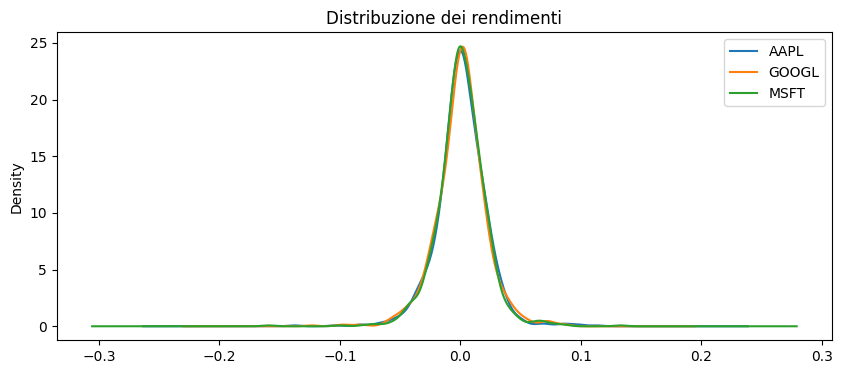

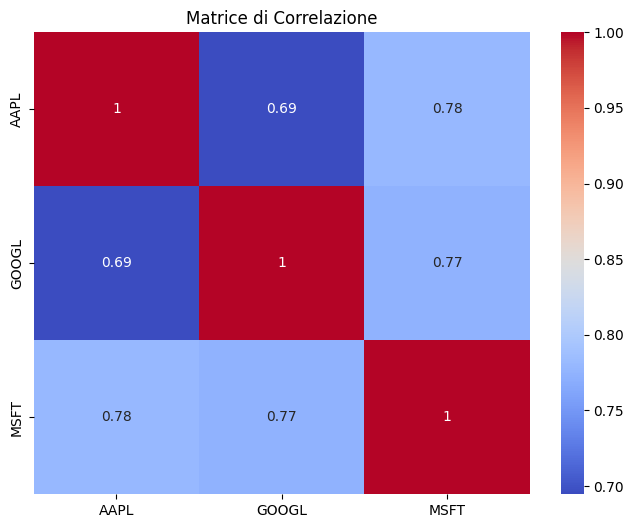

In [4]:
returns = np.log(prices / prices.shift(1)).dropna()
returns.plot(kind='kde', figsize=(10, 4))
plt.title('Distribuzione dei rendimenti')

# Controllo preliminare sui returns
print("Statistiche returns:")
print(returns.describe())
print("\nMedia giornaliera:", returns.mean().round(6))

# Verifica correlazione
corr_matrix = returns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione');

In [5]:
returns = returns * 100  # Scala i rendimenti per evitare problemi di numeri troppo piccoli
optimizer = MarkowitzOptimizer(returns=returns)
print(optimizer.returns)
frontier = optimizer.efficient_frontier()
print(f"Frontier: {frontier}")
sharpes = optimizer.max_sharpe_ratio()
print(f"Sharpes: {sharpes}")

INFO:model.efficient_frontier.markowitz_optimizer:Configurazione caricata da: parameters/model_parameters.yaml
INFO:model.efficient_frontier.markowitz_optimizer:Stima della matrice di covarianza
INFO:model.efficient_frontier.markowitz_optimizer:Matrice di covarianza stimata con Ledoit-Wolf
INFO:model.efficient_frontier.markowitz_optimizer:Validazione dei dati di input
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo della frontiera efficiente
INFO:model.efficient_frontier.markowitz_optimizer:Target di ritorno: [0.005      0.00552632 0.00605263 0.00657895 0.00710526 0.00763158
 0.00815789 0.00868421 0.00921053 0.00973684 0.01026316 0.01078947
 0.01131579 0.01184211 0.01236842 0.01289474 0.01342105 0.01394737
 0.01447368 0.015     ]
INFO:model.efficient_frontier.markowitz_optimizer:Ottimizzazione per target di ritorno: 0.005
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafogli

                AAPL     GOOGL      MSFT
Date                                    
2020-01-03 -0.976949 -0.524511 -1.253026
2020-01-06  0.793674  2.630506  0.258165
2020-01-07 -0.471426 -0.193340 -0.915957
2020-01-08  1.595832  0.709244  1.580273
2020-01-09  2.101824  1.044324  1.241582
...              ...       ...       ...
2023-12-22 -0.556289  0.759102  0.278013
2023-12-26 -0.284498  0.021214  0.021365
2023-12-27  0.051783 -0.815939 -0.157590
2023-12-28  0.222383 -0.099793  0.322937
2023-12-29 -0.543895 -0.385814  0.202308

[1005 rows x 3 columns]


INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calc

NameError: name 'result' is not defined

INFO:model.efficient_frontier.markowitz_optimizer:Calcolo della frontiera efficiente
INFO:model.efficient_frontier.markowitz_optimizer:Target di ritorno: [0.005      0.00552632 0.00605263 0.00657895 0.00710526 0.00763158
 0.00815789 0.00868421 0.00921053 0.00973684 0.01026316 0.01078947
 0.01131579 0.01184211 0.01236842 0.01289474 0.01342105 0.01394737
 0.01447368 0.015     ]
INFO:model.efficient_frontier.markowitz_optimizer:Ottimizzazione per target di ritorno: 0.005
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del portafoglio
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Portafoglio di volatilità calcolata
INFO:model.efficient_frontier.markowitz_optimizer:Calcolo del rendimento atteso del por

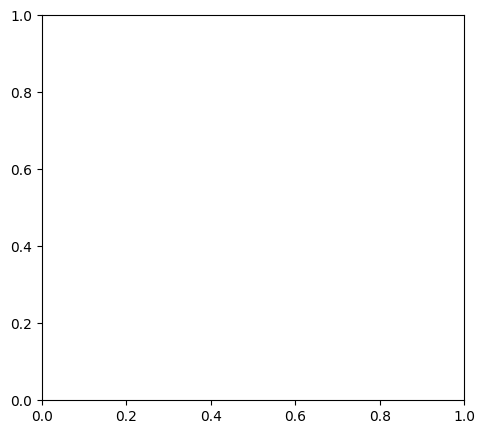

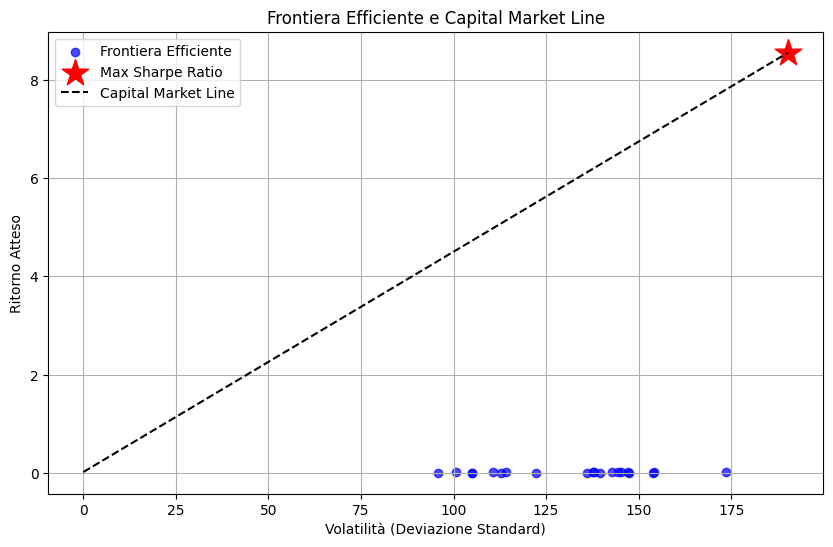

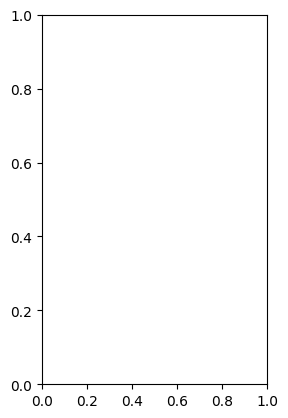

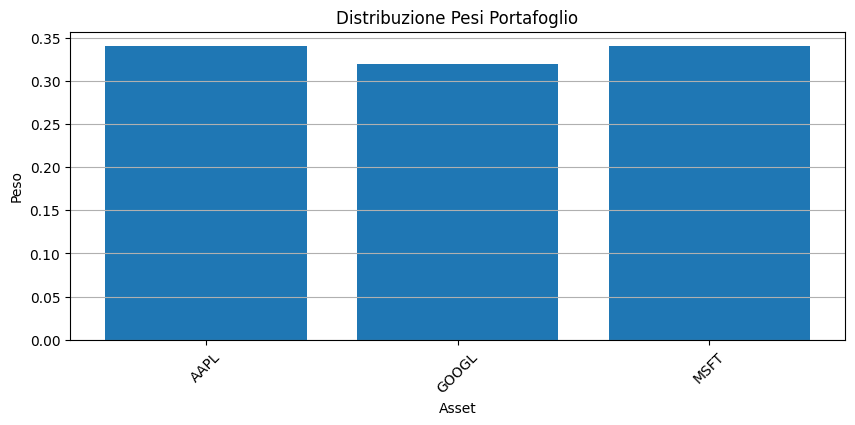

<Figure size 640x480 with 0 Axes>

In [6]:
viz = Visualizer(optimizer)

# Genera grafici
viz.plot_efficient_frontier(OUTPUT_PATH / 'frontiera_notebook.png')
viz.plot_weights_distribution(
    dict(zip(returns.columns, sharpes['weights'])),
    OUTPUT_PATH / 'allocazione_notebook.png'
)

# Mostra anteprima inline
plt.figure(figsize=(12, 5))
plt.subplot(121)
viz.plot_efficient_frontier()
plt.subplot(122)
viz.plot_weights_distribution(dict(zip(returns.columns, sharpes['weights'])))
plt.tight_layout();